In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, CondensedNearestNeighbour
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
from xgboost import XGBClassifier  # ✅ Use XGBClassifier instead of XGBRegressor
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")


In [4]:
df= pd.read_csv('../data/processed/version2_processed_dataset_featureeng_featurescaling.csv')

#### train test split, split 20% for test

In [5]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Churn'])
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)


In [7]:
train_df.to_csv('../data/processed/final_train_df.csv', index=False)
test_df.to_csv('../data/processed/final_test_df.csv', index=False)

In [8]:
train_df.shape, test_df.shape

((5634, 25), (1409, 25))

In [10]:
train_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,tenure_range
0,0,35,3.916015,7.439941,0,True,False,False,False,True,...,False,False,False,True,False,True,True,False,False,2
1,0,15,4.332048,7.049732,0,True,True,False,False,False,...,False,True,False,False,False,False,False,False,False,1
2,0,13,3.726898,6.382408,0,True,False,False,False,False,...,False,True,True,False,True,False,False,False,True,1
3,0,26,4.310799,7.553129,0,False,False,False,True,False,...,False,False,True,True,False,True,True,False,True,2
4,0,1,3.818811,3.818811,0,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0,71,4.702751,8.950105,0,False,True,False,False,True,...,True,False,True,True,True,True,True,False,True,5
5630,0,2,3.851211,4.398761,1,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
5631,1,25,4.642466,7.886532,1,False,True,False,False,False,...,True,True,True,False,False,True,True,False,False,2
5632,0,24,3.063391,6.181672,0,False,False,True,True,False,...,False,False,False,False,False,False,False,True,False,1


#### Handling data imbalance

In [11]:
X_train = train_df.drop(columns=['Churn'])
y_train = train_df['Churn']

In [12]:
sm = SMOTE(random_state = 0, sampling_strategy = 'minority', k_neighbors= 5)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

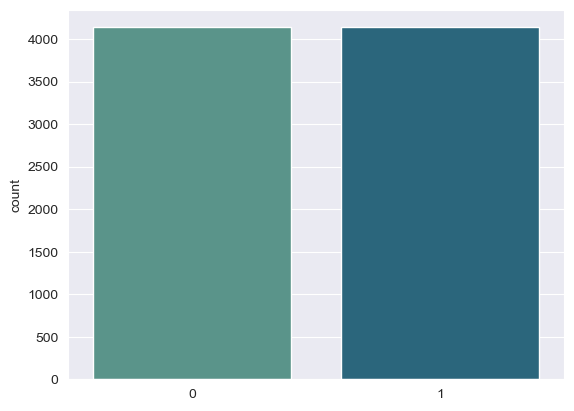

In [13]:

_ = sns.countplot(x=y_train, palette='crest')

In [15]:
train_df.shape

(5634, 25)

In [16]:
X_test = test_df.drop(columns=['Churn'])
y_test = test_df['Churn']

## Model training

Trainig different models on the data to compare results of each model

# Logistic Regression

In [17]:
model_logReg = LogisticRegression(C=200, max_iter=1000)

scores = cross_val_score(model_logReg, X_train, y_train, cv=10, scoring="f1")
print(scores)
model_logReg.fit(X_train, y_train)

[0.74226804 0.72093023 0.74840358 0.78326996 0.86827033 0.86757991
 0.87854711 0.84977578 0.84641638 0.85682575]


LogisticRegression(C=200, max_iter=1000)

In [18]:
log_pred = model_logReg.predict(X_test)

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

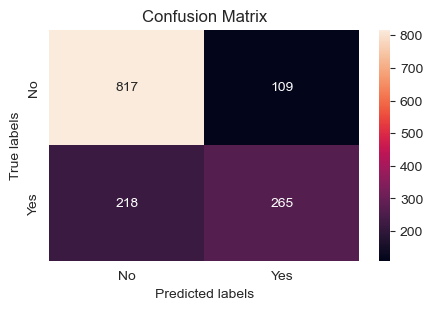

In [19]:
cm = confusion_matrix(log_pred, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])

In [20]:
print(classification_report(y_test, log_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.88      0.79      0.83      1035
         Yes       0.55      0.71      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409



# Random Forest

Fitting 5 folds for each of 5 candidates, totalling 25 fits
RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       n_estimators=200, random_state=0)
              precision    recall  f1-score   support

          No       0.89      0.77      0.83      1035
         Yes       0.54      0.72      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409



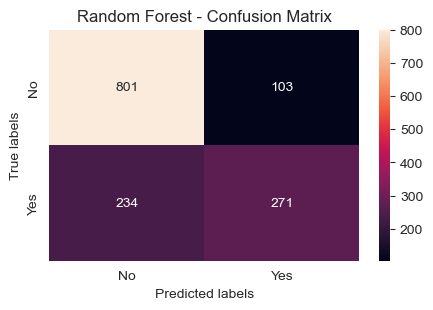

In [30]:
# ==== Imports ====
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

# ==== Random Forest Hyperparameters ====
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# ==== Model Initialization ====
rf_model = RandomForestClassifier(random_state=0)

# ==== Cross Validation Strategy ====
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# ==== Hyperparameter Search ====
rf_search = RandomizedSearchCV(
    rf_model,
    param_distributions=rf_params,
    n_iter=5,
    scoring='roc_auc',
    n_jobs=2,
    cv=skf,
    verbose=1,
    random_state=0
)

# ==== Fit the Model ====
rf_search.fit(X_train, y_train)
print(rf_search.best_estimator_)

# ==== Predict on Test Set ====
rf_pred = rf_search.predict(X_test)

# ==== Confusion Matrix ====
cm = confusion_matrix(rf_pred, y_test)
f, ax = plt.subplots(1, 1, figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Random Forest - Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

# ==== Classification Report ====
print(classification_report(y_test, rf_pred, target_names=['No', 'Yes']))


# SVM model

In [21]:
model_svm = SVC(kernel='linear', C=20)
scores = cross_val_score(model_logReg, X_train, y_train, cv=10, scoring="f1")
print(scores)

model_svm.fit(X_train, y_train)

[0.74226804 0.72093023 0.74840358 0.78326996 0.86827033 0.86757991
 0.87854711 0.84977578 0.84641638 0.85682575]


SVC(C=20, kernel='linear')

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

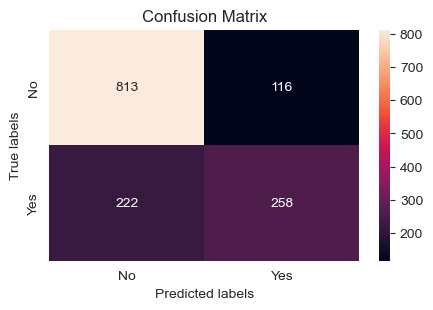

In [22]:
svm_pred = model_svm.predict(X_test)
cm = confusion_matrix(svm_pred, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])

In [23]:
print(classification_report(y_test, svm_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.88      0.79      0.83      1035
         Yes       0.54      0.69      0.60       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409



# XGboost

In [26]:
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [1.5, 2, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [4, 5, 8]
}

model_xgb = xgb.XGBClassifier(
    learning_rate=0.08, 
    n_estimators=100, 
    objective='binary:logistic', 
    verbosity=0  
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

random_search = RandomizedSearchCV(
    model_xgb, 
    param_distributions=params, 
    n_iter=5, 
    scoring='roc_auc', 
    n_jobs=2, 
    cv=skf, 
    verbose=1, 
    random_state=0
)

_ = random_search.fit(X_train, y_train)
print(random_search.best_estimator_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [27]:
xgb_pred = random_search.predict(X_test)

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

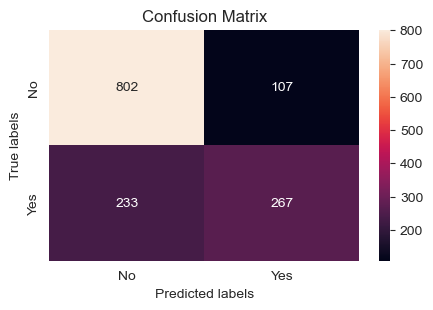

In [28]:
cm = confusion_matrix(xgb_pred, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])

In [29]:
print(classification_report(y_test, xgb_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.88      0.77      0.83      1035
         Yes       0.53      0.71      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409



## COMPARISON

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Store all predictions in a dictionary
predictions = {
    "Logistic Regression": log_pred,
    "Random Forest": rf_pred,
    "SVM": svm_pred,
    "XGBoost": xgb_pred
}

# Store probability predictions for ROC AUC
prob_predictions = {
    "Logistic Regression": model_logReg.predict_proba(X_test)[:,1],
    "Random Forest": rf_search.predict_proba(X_test)[:,1],
    "SVM": model_svm.decision_function(X_test),  # No predict_proba for SVM with linear kernel
    "XGBoost": random_search.predict_proba(X_test)[:,1]
}

# Collect performance metrics
results = []
for model in predictions:
    y_pred = predictions[model]
    y_prob = prob_predictions[model]
    results.append({
        "Model": model,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_prob)
    })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="ROC AUC", ascending=False)
print(df_results)


                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
1        Random Forest  0.760823   0.536634  0.724599  0.616610  0.836016
3              XGBoost  0.758694   0.534000  0.713904  0.610984  0.833742
0  Logistic Regression  0.767921   0.548654  0.708556  0.618436  0.821470
2                  SVM  0.760114   0.537500  0.689840  0.604215  0.820778


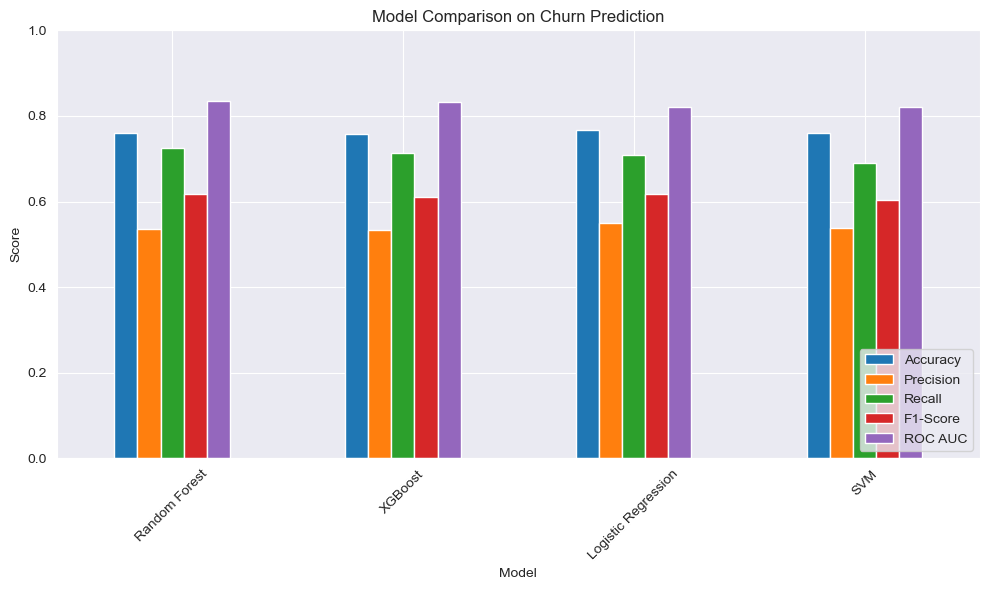

In [32]:
df_results.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison on Churn Prediction")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 🔍 Churn Prediction: Best Model Selection

## 📊 Model Performance Summary

| Model                | Accuracy | Precision | Recall   | F1-Score | ROC AUC |
|---------------------|----------|-----------|----------|----------|---------|
| **Random Forest**    | 0.7608   | 0.5366    | **0.7246** | 0.6166   | **0.8360** ✅ |
| XGBoost              | 0.7587   | 0.5340    | 0.7139   | 0.6110   | 0.8337   |
| Logistic Regression  | **0.7679** | **0.5487** | 0.7086   | **0.6184** | 0.8215   |
| SVM                  | 0.7601   | 0.5375    | 0.6898   | 0.6042   | 0.8208   |

---

## 🧠 Business Context: Why Recall Matters

In churn prediction:
- **Recall** is crucial because you want to **identify as many customers who are likely to churn as possible.**
- **Missing a churner means losing a customer**, which leads to revenue loss.

---

## ✅ Best Model: Random Forest

### Why?
- **Highest Recall** → Best at detecting customers who are likely to churn (72.46%).
- **Highest ROC AUC** → Best at overall class separation (83.60%).
- **Competitive F1-Score** → Balanced performance between precision and recall.

---

## 🧑‍💼 Real-Life Example:

Let’s say you have 100 churners:
- **Random Forest** would catch ~72 of them.
- **Logistic Regression** would catch ~70.
- Missing even 2–3 churners could result in lost revenue.

**Random Forest** also provides:
- **Feature Importance** → Helps explain *why* customers churn.
- **Robustness** → Less prone to overfitting, especially with cross-validation and hyperparameter tuning.

---

## 📌 Final Recommendation:

Use **Random Forest** as the **best model** for churn prediction in this case.




                           Feature  Importance
1                           tenure    0.136114
8   PaymentMethod_Electronic check    0.108114
3                     TotalCharges    0.107746
2                   MonthlyCharges    0.098847
5      InternetService_Fiber optic    0.098121
23                    tenure_range    0.086629
22               Contract_Two year    0.080233
13            PaperlessBilling_Yes    0.065415
6               InternetService_No    0.029411
21               Contract_One year    0.027124


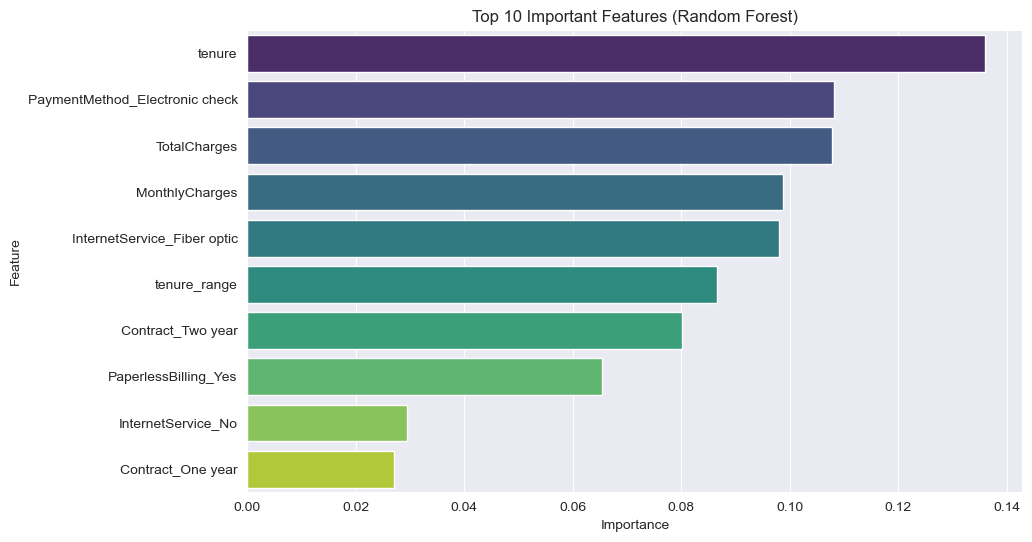

In [33]:
# Get feature importances
feature_importances = rf_search.best_estimator_.feature_importances_

# Create a DataFrame with feature names and their importance
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 features
top_features = importance_df.head(10)
print(top_features)

# Plotting the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Important Features (Random Forest)')
plt.show()


In [35]:
import joblib

# Save the Random Forest model
joblib.dump(rf_search.best_estimator_, '../models/random_forest_model.joblib')




['../models/random_forest_model.joblib']